# Replace data in a pre-made NetCDF file

Replace fake or interpolated rainfall (when ready) to a pre-made NetCDF forcing that was successfully run WRF hydro.  This works but it doesn't have the flexibility to change similation domain if we're interested in other region, where doesn't have pre-made NetCDF file

In [22]:
import xarray as xr
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

In [3]:
f = '../example_output/nwm.20190321/nwm.t00z.analysis_assim.forcing.tm00.hawaii.nc'
ds = xr.open_dataset(f)
lat = 21.241737
lon = -158.28706
variable = 'RAINRATE'

In [5]:
ds

<xarray.Dataset>
Dimensions:                     (reference_time: 1, time: 1, x: 590, y: 390)
Coordinates:
  * time                        (time) datetime64[ns] 2019-03-21
  * y                           (y) float64 -1.945e+05 -1.935e+05 ... 1.945e+05
  * x                           (x) float64 -2.945e+05 -2.935e+05 ... 2.945e+05
  * reference_time              (reference_time) datetime64[ns] 2019-03-20T21:00:00
Data variables:
    U2D                         (time, y, x) float64 ...
    V2D                         (time, y, x) float64 ...
    LWDOWN                      (time, y, x) float64 ...
    RAINRATE                    (time, y, x) float32 ...
    ProjectionCoordinateSystem  |S1 ...
    T2D                         (time, y, x) float64 ...
    Q2D                         (time, y, x) float64 ...
    PSFC                        (time, y, x) float64 ...
    SWDOWN                      (time, y, x) float64 ...
Attributes:
    NWM_version_number:         v2.0
    model_output_valid_

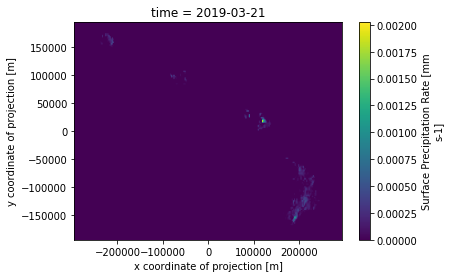

In [23]:
rainrate = ds.RAINRATE
rainrate.plot()

In [44]:
# get lat, lon, and var as numpy arrays
y = ds.coords['y'].values
x = ds.coords['x'].values
vals = ds[variable].values

### Generate random rainfall

In [94]:
import random
# insert random data
for i in range(0, len(y), 1):
    for j in range (0, len(x), 1):
        vals[0][i][j] = random.uniform(vals.min(), vals.max())


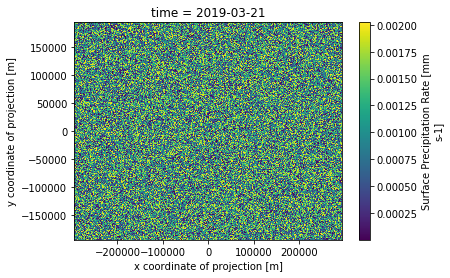

In [95]:
rainrate.plot()

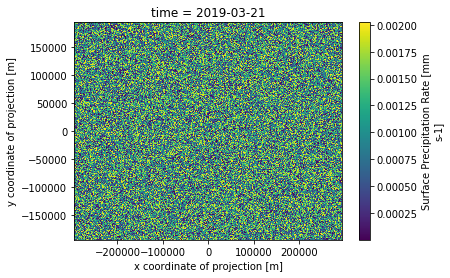

In [102]:
ds.RAINRATE.plot()

In [105]:
ds.to_netcdf('../example_data/Test_fake_rainfall/2019022606.LDASIN_DOMAIN1')